## Import and Install Dependencies

In [3]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [156]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## Keypoints using MP Holistic

In [157]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [158]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [159]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [160]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #read feed
        ret, frame = cap.read()
        
        #make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
          
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [87]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

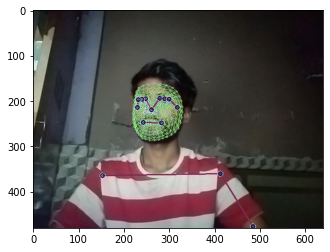

In [90]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract KeyPoint Values

In [161]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [93]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [94]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [95]:
result_test = extract_keypoints(results)

In [96]:
result_test

array([ 0.40862522,  0.45729247, -0.88252717, ...,  0.        ,
        0.        ,  0.        ])

## Setup folders for Collections

In [100]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [101]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [102]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

##  Collect Keypoint Values for Training and Testing

In [103]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [104]:
cap.release()
cv2.destroyAllWindows()

## Preprocess Data and Create Labels and Features

In [105]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [106]:
label_map = {label:num for num, label in enumerate(actions)}

In [107]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [108]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [109]:
np.array(sequences).shape

(90, 30, 1662)

In [110]:
np.array(labels).shape

(90,)

In [111]:
X = np.array(sequences)

In [112]:
X.shape

(90, 30, 1662)

In [113]:
y = to_categorical(labels).astype(int)

In [114]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [116]:
y_test.shape

(5, 3)

## Build and Train LSTM Neural Network

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [118]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [138]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [139]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [123]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 257ms/step - loss: 1.5117 - categorical_accuracy: 0.2936
Epoch 2/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.4683 - categorical_accuracy: 0.2838
Epoch 3/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.2407 - categorical_accuracy: 0.4031
Epoch 4/2000
3/3 [==============================] - 0s 60ms/step - loss: 9.6719 - categorical_accuracy: 0.3249
Epoch 5/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.6115 - categorical_accuracy: 0.2760
Epoch 6/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.4590 - categorical_accuracy: 0.3503
Epoch 7/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1031 - categorical_accuracy: 0.3719
Epoch 8/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.9273 - categorical_accuracy: 0.5791
Epoch 9/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.9506 - categorical_accuracy: 0.5967


3/3 [==============================] - 0s 59ms/step - loss: 0.2887 - categorical_accuracy: 0.8552
Epoch 75/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3562 - categorical_accuracy: 0.8298
Epoch 76/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2193 - categorical_accuracy: 0.9393
Epoch 77/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2957 - categorical_accuracy: 0.8904
Epoch 78/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2492 - categorical_accuracy: 0.8825
Epoch 79/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3259 - categorical_accuracy: 0.8611
Epoch 80/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2141 - categorical_accuracy: 0.9198
Epoch 81/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2402 - categorical_accuracy: 0.9022
Epoch 82/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2276 - categorical_accuracy: 0.9041
Epoch 

3/3 [==============================] - 0s 58ms/step - loss: 0.2108 - categorical_accuracy: 0.9002
Epoch 147/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1608 - categorical_accuracy: 0.9413
Epoch 148/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1978 - categorical_accuracy: 0.9041
Epoch 149/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1456 - categorical_accuracy: 0.9843
Epoch 150/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1664 - categorical_accuracy: 0.9315
Epoch 151/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1791 - categorical_accuracy: 0.9354
Epoch 152/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3885 - categorical_accuracy: 0.8376
Epoch 153/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3611 - categorical_accuracy: 0.8376
Epoch 154/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1911 - categorical_accuracy: 0.956

3/3 [==============================] - 0s 57ms/step - loss: 0.0532 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0374 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0144 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0954 - categorical_accuracy: 0.9804
Epoch 223/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1852 - categorical_accuracy: 0.9119
Epoch 224/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2705 - categorical_accuracy: 0.8767
Epoch 225/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0762 - categorical_accuracy: 0.9824
Epoch 226/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1151 - categorical_accuracy: 0.923

3/3 [==============================] - 0s 58ms/step - loss: 1.0680e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0163e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.8722e-05 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 57ms/step - loss: 9.5577e-05 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.7668e-05 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.1003e-05 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.4665e-05 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.9739e-05 - categorical_accuracy: 1.0000
Epoch 297/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.47

3/3 [==============================] - 0s 58ms/step - loss: 1.0823e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 58ms/step - loss: 9.9634e-06 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0626e-05 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.5483e-06 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.1933e-06 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.4072e-06 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0100e-05 - categorical_accuracy: 1.0000
Epoch 366/2000
3/3 [==============================] - 0s 58ms/step - loss: 6.5689e-06 - categorical_accuracy: 1.0000
Epoch 367/2000
3/3 [==============================] - 0s 57ms/step - loss: 8.30

3/3 [==============================] - 0s 54ms/step - loss: 1.9056e-06 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.8498e-06 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.3876e-06 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9838e-06 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.8547e-06 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.6072e-06 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.6266e-06 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.6575e-06 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.65

3/3 [==============================] - 0s 56ms/step - loss: 6.5962e-07 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.8918e-07 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.8799e-07 - categorical_accuracy: 1.0000
Epoch 501/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.0206e-07 - categorical_accuracy: 1.0000
Epoch 502/2000
3/3 [==============================] - 0s 61ms/step - loss: 5.7923e-07 - categorical_accuracy: 1.0000
Epoch 503/2000
3/3 [==============================] - 0s 59ms/step - loss: 6.4814e-07 - categorical_accuracy: 1.0000
Epoch 504/2000
3/3 [==============================] - 0s 59ms/step - loss: 7.2100e-07 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 62ms/step - loss: 4.1947e-07 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.58

3/3 [==============================] - 0s 56ms/step - loss: 2.2634e-07 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9724e-07 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.1376e-07 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.1178e-07 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9373e-07 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.2667e-07 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.8825e-07 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.3307e-07 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.08

3/3 [==============================] - 0s 58ms/step - loss: 1.6933e-07 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.6187e-07 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.8818e-07 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.6001e-07 - categorical_accuracy: 1.0000
Epoch 641/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.6792e-07 - categorical_accuracy: 1.0000
Epoch 642/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.6932e-07 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.7817e-07 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.4324e-07 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.81

3/3 [==============================] - 0s 56ms/step - loss: 1.0728e-07 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.2847e-08 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 57ms/step - loss: 9.0519e-08 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0705e-07 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.6107e-08 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 55ms/step - loss: 7.5147e-08 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1706e-07 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 57ms/step - loss: 9.7729e-08 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.07

3/3 [==============================] - 0s 58ms/step - loss: 5.9966e-08 - categorical_accuracy: 1.0000
Epoch 778/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.3249e-08 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 57ms/step - loss: 6.9745e-08 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.7158e-08 - categorical_accuracy: 1.0000
Epoch 781/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.8127e-08 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.0898e-08 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.6014e-08 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.7854e-08 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 55ms/step - loss: 7.18

3/3 [==============================] - 0s 59ms/step - loss: 5.1086e-08 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 57ms/step - loss: 5.0154e-08 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.0399e-08 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.9904e-08 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.9904e-08 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.3630e-08 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.9462e-08 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.4316e-08 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.99

3/3 [==============================] - 0s 62ms/step - loss: 5.0368e-08 - categorical_accuracy: 1.0000
Epoch 918/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.2918e-08 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.1276e-08 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.0589e-08 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.5010e-08 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.7094e-08 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.3613e-08 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.2202e-08 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.12

3/3 [==============================] - 0s 57ms/step - loss: 3.1955e-08 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.7299e-08 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.9406e-08 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.4970e-08 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.1245e-08 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.1245e-08 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.5902e-08 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.7299e-08 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.31

3/3 [==============================] - 0s 54ms/step - loss: 2.0308e-08 - categorical_accuracy: 1.0000
Epoch 1056/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.8690e-08 - categorical_accuracy: 1.0000
Epoch 1057/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.6141e-08 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.1019e-08 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.8690e-08 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.1249e-08 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.9386e-08 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.8455e-08 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 2.6592e-08 - categorical_accuracy: 1.0000
Epoch 1125/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.1234e-08 - categorical_accuracy: 1.0000
Epoch 1126/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.3341e-08 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.7509e-08 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.6112e-08 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.4273e-08 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.1694e-08 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.9380e-08 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 59ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 1.5405e-08 - categorical_accuracy: 1.0000
Epoch 1194/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.2155e-08 - categorical_accuracy: 1.0000
Epoch 1195/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.2155e-08 - categorical_accuracy: 1.0000
Epoch 1196/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.2155e-08 - categorical_accuracy: 1.0000
Epoch 1197/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.0297e-08 - categorical_accuracy: 1.0000
Epoch 1198/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.6572e-08 - categorical_accuracy: 1.0000
Epoch 1199/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.7748e-08 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.5650e-08 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 54ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 1.9119e-08 - categorical_accuracy: 1.0000
Epoch 1263/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.9119e-08 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1669e-08 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 57ms/step - loss: 7.9436e-09 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3767e-08 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.1683e-08 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.8889e-08 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.6791e-08 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 1.9119e-08 - categorical_accuracy: 1.0000
Epoch 1332/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.8188e-08 - categorical_accuracy: 1.0000
Epoch 1333/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.4093e-09 - categorical_accuracy: 1.0000
Epoch 1334/2000
3/3 [==============================] - 0s 57ms/step - loss: 7.4780e-09 - categorical_accuracy: 1.0000
Epoch 1335/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.0982e-08 - categorical_accuracy: 1.0000
Epoch 1336/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1203e-08 - categorical_accuracy: 1.0000
Epoch 1337/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.2370e-08 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3532e-08 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 59ms/step - lo

3/3 [==============================] - 0s 60ms/step - loss: 1.7021e-08 - categorical_accuracy: 1.0000
Epoch 1401/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1433e-08 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.8884e-08 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 61ms/step - loss: 9.1050e-09 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.6090e-08 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.6090e-08 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1433e-08 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.3296e-08 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 8.8695e-09 - categorical_accuracy: 1.0000
Epoch 1470/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.6786e-08 - categorical_accuracy: 1.0000
Epoch 1471/2000
3/3 [==============================] - 0s 59ms/step - loss: 8.4038e-09 - categorical_accuracy: 1.0000
Epoch 1472/2000
3/3 [==============================] - 0s 55ms/step - loss: 9.3351e-09 - categorical_accuracy: 1.0000
Epoch 1473/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.0755e-09 - categorical_accuracy: 1.0000
Epoch 1474/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.3351e-09 - categorical_accuracy: 1.0000
Epoch 1475/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.5854e-08 - categorical_accuracy: 1.0000
Epoch 1476/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.5389e-08 - categorical_accuracy: 1.0000
Epoch 1477/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 58ms/step - loss: 9.8008e-09 - categorical_accuracy: 1.0000
Epoch 1539/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.5389e-08 - categorical_accuracy: 1.0000
Epoch 1540/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.5854e-08 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.3351e-09 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.5389e-08 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0266e-08 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 57ms/step - loss: 8.8695e-09 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.8008e-09 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 58ms/step - loss: 1.1658e-08 - categorical_accuracy: 1.0000
Epoch 1608/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.6730e-09 - categorical_accuracy: 1.0000
Epoch 1609/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1658e-08 - categorical_accuracy: 1.0000
Epoch 1610/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.2589e-08 - categorical_accuracy: 1.0000
Epoch 1611/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1658e-08 - categorical_accuracy: 1.0000
Epoch 1612/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 1613/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.9327e-09 - categorical_accuracy: 1.0000
Epoch 1614/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 1615/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 58ms/step - loss: 1.1658e-08 - categorical_accuracy: 1.0000
Epoch 1677/2000
3/3 [==============================] - 0s 58ms/step - loss: 6.5357e-09 - categorical_accuracy: 1.0000
Epoch 1678/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1658e-08 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 57ms/step - loss: 7.9327e-09 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 58ms/step - loss: 7.9327e-09 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.6044e-09 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [==============================] - 0s 59ms/step - loss: 6.5357e-09 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.2589e-08 - categorical_accuracy: 1.0000
Epoch 1684/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 5.3688e-09 - categorical_accuracy: 1.0000
Epoch 1746/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0491e-08 - categorical_accuracy: 1.0000
Epoch 1747/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.3688e-09 - categorical_accuracy: 1.0000
Epoch 1748/2000
3/3 [==============================] - 0s 54ms/step - loss: 6.7658e-09 - categorical_accuracy: 1.0000
Epoch 1749/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0491e-08 - categorical_accuracy: 1.0000
Epoch 1750/2000
3/3 [==============================] - 0s 55ms/step - loss: 9.0941e-09 - categorical_accuracy: 1.0000
Epoch 1751/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.9718e-09 - categorical_accuracy: 1.0000
Epoch 1752/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.9031e-09 - categorical_accuracy: 1.0000
Epoch 1753/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 61ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 1815/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.4615e-09 - categorical_accuracy: 1.0000
Epoch 1816/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.5989e-09 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 59ms/step - loss: 7.4615e-09 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.6676e-09 - categorical_accuracy: 1.0000
Epoch 1820/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.5989e-09 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.3929e-09 - categorical_accuracy: 1.0000
Epoch 1822/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 58ms/step - loss: 5.3633e-09 - categorical_accuracy: 1.0000
Epoch 1884/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.8977e-09 - categorical_accuracy: 1.0000
Epoch 1885/2000
3/3 [==============================] - 0s 62ms/step - loss: 5.3633e-09 - categorical_accuracy: 1.0000
Epoch 1886/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.8977e-09 - categorical_accuracy: 1.0000
Epoch 1887/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.5007e-09 - categorical_accuracy: 1.0000
Epoch 1888/2000
3/3 [==============================] - 0s 59ms/step - loss: 6.2946e-09 - categorical_accuracy: 1.0000
Epoch 1889/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.5694e-09 - categorical_accuracy: 1.0000
Epoch 1890/2000
3/3 [==============================] - 0s 60ms/step - loss: 5.3633e-09 - categorical_accuracy: 1.0000
Epoch 1891/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 55ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.1964e-09 - categorical_accuracy: 1.0000
Epoch 1954/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.7994e-09 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1958/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.1964e-09 - categorical_accuracy: 1.0000
Epoch 1960/2000
3/3 [==============================] - 0s 56ms/step - lo

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

## Make Predictions

In [125]:
res = model.predict(X_test)

In [132]:
actions[np.argmax(res[4])]

'thanks'

In [133]:
actions[np.argmax(y_test[4])]

'thanks'

## Save Weights

In [141]:
model.save('action.h5')

In [140]:
model.load_weights('action.h5')

## Evaluation using Confusion Matrix and Accuracy

In [142]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [143]:
yhat = model.predict(X_test)

In [144]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [145]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [146]:
accuracy_score(ytrue, yhat)

1.0

## Test in Real Time

In [150]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

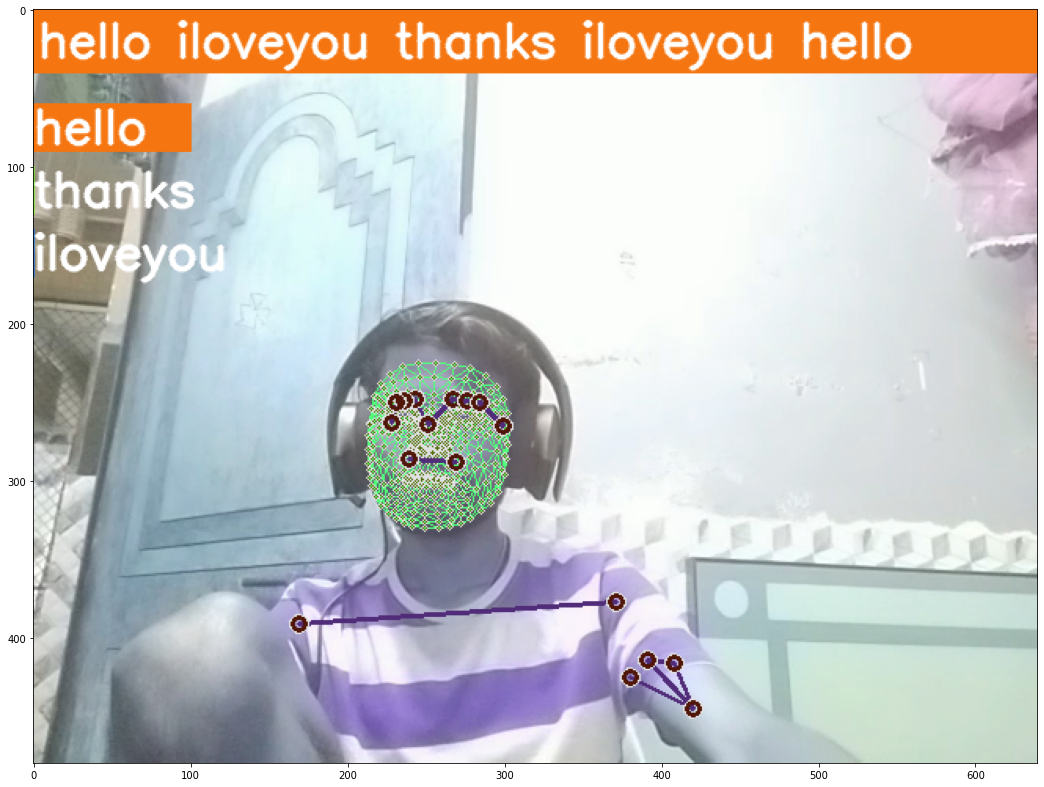

In [151]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [155]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [152]:
res[np.argmax(res)] > threshold

True

In [154]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[1.0000000e+00, 4.1582057e-14, 1.0650352e-14]], dtype=float32)